# Basic Element, Specie and Composition objects¶


In [18]:
import pymatgen as mg
si = mg.Element("Si")
print("Atomic mass of Si is {}".format(si.atomic_mass))
print("Si has a melting point of {}".format(si.melting_point))
print("Ionic radii for Si: {}".format(si.ionic_radii))
print("Atomic mass of Si in kg: {}".format(si.atomic_mass.to("kg")))

Atomic mass of Si is 28.0855 amu
Si has a melting point of 1687.0 K
Ionic radii for Si: {4: 0.54}
Atomic mass of Si in kg: 4.6637069207919995e-26 kg


In [19]:
fe2 = mg.Specie("Fe", 2) #Species are like Elements, except they have an explicit oxidation state.
print(fe2.atomic_mass)
print(fe2.ionic_radius)

55.845 amu
0.92 ang


In [20]:
comp = mg.Composition("Fe2O3")
print("Weight of Fe2O3 is {}".format(comp.weight))
print("Amount of Fe in Fe2O3 is {}".format(comp["Fe"]))
print("Atomic fraction of Fe is {}".format(comp.get_atomic_fraction("Fe")))
print("Weight fraction of Fe is {}".format(comp.get_wt_fraction("Fe")))

Weight of Fe2O3 is 159.6882 amu
Amount of Fe in Fe2O3 is 2.0
Atomic fraction of Fe is 0.4
Weight fraction of Fe is 0.699425505453753 


# Lattice & Structure objects

In [21]:
# Creates cubic Lattice with lattice parameter 4.2 A
lattice = mg.Lattice.cubic(4.2)
print(lattice)
print(lattice.abc)

4.200000 0.000000 0.000000
0.000000 4.200000 0.000000
0.000000 0.000000 4.200000
(4.2, 4.2, 4.2)


In [22]:
structure = mg.Structure(lattice, ["Na", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
print("Unit cell vol = {}".format(structure.volume))
print("First site of the structure is {}".format(structure[0]))
print("Second site of the structure is {}".format(structure[1]))

Unit cell vol = 74.08800000000001
First site of the structure is [0. 0. 0.] Na
Second site of the structure is [2.1 2.1 2.1] Cl


In [23]:
#manipulation with structure
structure.make_supercell([2, 2, 1]) #Make a 3 x 2 x 1 supercell of the structure

del structure[0] #Remove the first site
structure.append("Na", [0,0,0]) #Append a Na atom.
structure[-1] = "Li" #Change the last added atom to Li.
structure[0] = "Na", [0.01, 0.5, 0] #Shift the first atom by 0.01 in fractional coordinates in the x-direction.
immutable_structure = mg.IStructure.from_sites(structure) #Create an immutable structure (cannot be modified).
print(immutable_structure)

Full Formula (Na3 Li1 Cl4)
Reduced Formula: Na3LiCl4
abc   :   8.400000   8.400000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP       a     b    c
---  ----  ----  ----  ---
  0  Na    0.01  0.5   0
  1  Na    0.5   0     0
  2  Na    0.5   0.5   0
  3  Cl    0.25  0.25  0.5
  4  Cl    0.25  0.75  0.5
  5  Cl    0.75  0.25  0.5
  6  Cl    0.75  0.75  0.5
  7  Li    0     0     0


In [24]:
#from pymatgen.vis.structure_chemview  import quick_view
#quick_view(immutable_structure, bonds=True, conventional=False, transform=None, show_box=True, bond_tol=0.2, stick_radius=0.1)
immutable_structure.to(filename="POSCAR_Na3LiCl4")



# Basic analysis

In [25]:
#Determining the symmetry
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
finder = SpacegroupAnalyzer(structure)
print("The spacegroup is {}".format(finder.get_space_group_symbol()))

The spacegroup is Pmm2


In [26]:
from pymatgen.analysis.structure_matcher import StructureMatcher
#Let's create two structures which are the same topologically, but with different elements, and one lattice is larger.
s1 = mg.Structure(lattice, ["Na", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
s2 = mg.Structure(mg.Lattice.cubic(5), ["Rb", "F"], [[0, 0, 0], [0.5, 0.5, 0.5]])
m = StructureMatcher()
print(m.fit_anonymous(s1, s2)) #Returns a mapping which maps s1 and s2 onto each other. Strict element fitting is also available.

True


# Input/output

In [28]:
#Convenient IO to various formats. Format is intelligently determined from file name and extension.
structure.to(filename="POSCAR")
structure.to(filename="NaCl.cif")

#Or if you just supply fmt, you simply get a string.
# print(structure.to(fmt="poscar"))
print(structure.to(fmt="cif"))

# generated using pymatgen
data_Na3LiCl4
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   8.40000000
_cell_length_b   8.40000000
_cell_length_c   4.20000000
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Na3LiCl4
_chemical_formula_sum   'Na3 Li1 Cl4'
_cell_volume   296.35200000
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Na  Na1  1  0.010000  0.500000  0.000000  1
  Na  Na2  1  0.500000  0.000000  0.000000  1
  Na  Na3  1  0.500000  0.500000  0.000000  1
  Cl  Cl4  1  0.250000  0.250000  0.500000  1
  Cl  Cl5  1  0.250000  0.750000  0.500000  1
  Cl  Cl6  1  0.750000  0.250000  0.500000  1
  Cl  Cl7  1  0.750000  0.750000  0.500000  1
  Li  Li8  1 

In [ ]:
#Reading a structure from a file.
structure = mg.Structure.from_file("POSCAR")

In [29]:
from pymatgen.io.vasp.sets import MPRelaxSet # the path to POTCAR should be provided in ~/.pmgrc.yaml, which can be created using this command:  pmg config --add  PMG_VASP_PSP_DIR  /home/user/vasp_potentials/; the POTCAR files should be in subfolder POT_GGA_PAW_PBE
v = MPRelaxSet(structure)
v.write_input("MyInputFiles") #Writes a complete set of input files for structure to the directory MyInputFiles

/home/aksenov/miniconda3/lib/python3.6/site-packages/pymatgen/io/vasp/inputs.py:1492: UserWarning: Ignoring unknown variable type SHA256
  warnings.warn("Ignoring unknown variable type %s" % key)
/home/aksenov/miniconda3/lib/python3.6/site-packages/pymatgen/io/vasp/inputs.py:1492: UserWarning: Ignoring unknown variable type COPYR
  warnings.warn("Ignoring unknown variable type %s" % key)


# Getting structures from Databases

In [30]:
from pymatgen.ext.cod import COD # COD database http://www.crystallography.net/cod/
cod = COD()
structure = cod.get_structure_by_id(1010064)
print(structure)

Full Formula (Li8 O4)
Reduced Formula: Li2O
abc   :   4.610000   4.610000   4.610000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Li+   0.25  0.25  0.25
  1  Li+   0.25  0.75  0.75
  2  Li+   0.75  0.25  0.75
  3  Li+   0.75  0.75  0.25
  4  Li+   0.75  0.75  0.75
  5  Li+   0.75  0.25  0.25
  6  Li+   0.25  0.75  0.25
  7  Li+   0.25  0.25  0.75
  8  O2-   0     0     0
  9  O2-   0     0.5   0.5
 10  O2-   0.5   0     0.5
 11  O2-   0.5   0.5   0


# Getting band structure from a database

In [31]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.core import Spin
#This initiliazes the Rest connection to the Materials Project db. Put your own PMG_MAPI_KEY in ~/.pmgrc.yaml or use api_key as below
a = MPRester(api_key='AWqKPyV8EmTRlf1t') #
#load the band structure from mp-3748, CuAlO2 from the MP db
bs = a.get_bandstructure_by_material_id("mp-3748")

In [32]:
#is the material a metal (i.e., the fermi level cross a band)
print(bs.is_metal())
#print information on the band gap
print(bs.get_band_gap())
#print the energy of the 20th band and 10th kpoint
print(bs.bands[Spin.up][20][10])
#print energy of direct band gap
print(bs.get_direct_band_gap())


False
{'direct': False, 'energy': 1.8148, 'transition': '(0.591,0.409,0.000)-\\Gamma'}
18.004
2.7100999999999997


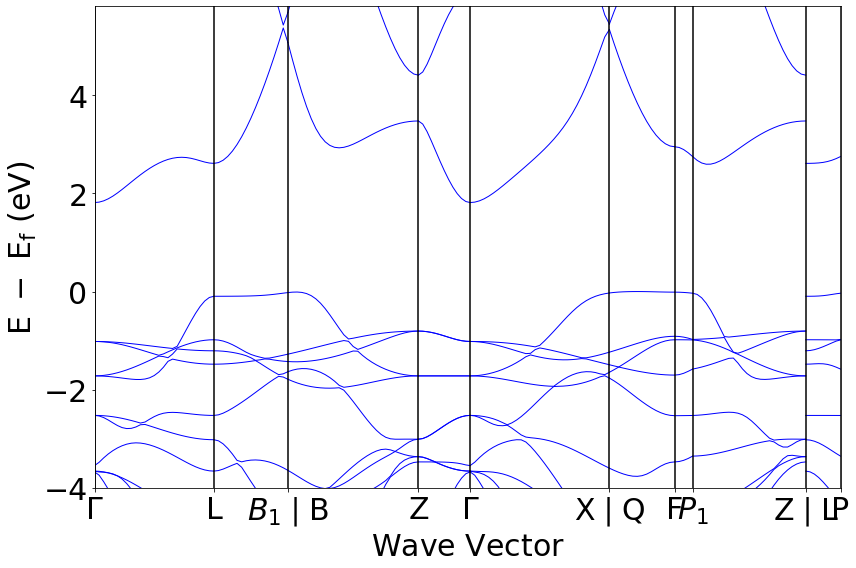

In [33]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSPlotter
plotter = BSPlotter(bs)
plotter.get_plot().show()

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

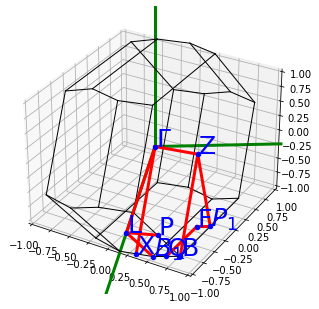

In [34]:
plotter.plot_brillouin()

In [38]:
#Generation of slabs
from pymatgen.core.surface import SlabGenerator

st = mg.Structure(lattice, ["Na", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]]) 
#or 
#structure = mg.Structure.from_file("POSCAR")
miller_index = [1,0,0]
min_slab_size = 10 #A
min_vacuum_size = 10 #A
primitive = 0
lll_reduce = 1
slabgen = SlabGenerator(st, miller_index, min_slab_size, min_vacuum_size, primitive = primitive, lll_reduce = lll_reduce )
# print(slabgen.oriented_unit_cell)
slabs = slabgen.get_slabs(symmetrize = 1)
for i, s in enumerate(slabs):
    s.to(filename="slabs/POSCAR_slab"+str(i))
